<a href="https://colab.research.google.com/github/dhyannnn/2030-Assignments/blob/main/Exercise%2026%20-%20Frequency%20Response.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

__Dhyan Thakkar__
<br>
Date: Mar. 18, 2022
<br>
PHYS 2030 W22

# <center><font color=#46769B>Exercise 26: Frequency Response</font></center>



## <font color=#46769B>Introduction</font>

A __driven damped harmonic oscillator__, with a driving function $F(t)$, is governed by the second-order ODE

$$y''(t) + \gamma y'(t) + \omega_0^2 y(t) = F(t) \, , \qquad (1)$$

where $\omega_0$ is the intrinsic angular frequency of the oscillator and $\gamma$ is the damping coefficient. We will consider a periodic driving function

$$F(t) = \left\{ \begin{array}{cc} F_0 \cos(\omega t) & t \ge 0 \\ 0 & t < 0 \end{array} \right.$$

that turns on at $t=0$, where $F_0$ is a positive constant. We will also assume that the oscillator is at rest initially:

$$y(0) = 0 , \quad y'(0) = 0 \, .$$

The goal of this exercise is to consider what is the *response* of the system, i.e., what is $y(t)$, as a function of the input driving frequency $\omega$. If we wait long enough, the solution will take the form

$$y(t) = A \cos(\omega t + \varphi) \, , \qquad (2)$$

where $A$ is the amplitude of the response and $\varphi$ is the phase. The goal of this exercise is to determine the amplitude $A(\omega)$ and phase $\varphi(\omega)$, as a function of the driving frequency $\omega$. This is known as the __frequency response function__.

You might worry that our solution in Eq. (2) may not satisfy the initial conditions we chose. Eq. (2) is not the *full* solution, as you will see. There is an extra *transient* part of the solution, that we will not worry about, which when added to Eq. (2) will allow the initial conditions to be satisfied. This piece will be damped away eventually (why we said "if we wait long enough..."), leaving only Eq. (2).

The goals of this exercise are:
- Gain further experience with RK methods
- Introduction to the frequency domain (prelude to next topic on Fourier methods)

Required reading:
- *Lesson 10: Second-order methods*


### <font color=#46769B>Analytic solution 1</font>

It is worthwhile to solve the problem *analytically* to see what we expect. If we plug Eq. (2) into Eq. (1), we can solve for $A$ and $\varphi$. First, plugging in, we get

$$- \omega^2 A \cos(\omega t + \varphi) - \gamma \omega A \sin(\omega t + \varphi) + \omega_0^2 A \cos(\omega t + \varphi) = F_0 \cos(\omega t) \, .$$

If we use some trigonometric identities and some algebra, we have

$$ A \left( (\omega_0^2 - \omega)^2 \cos\varphi - \gamma \omega \sin\varphi \right) \cos(\omega t) - A \left( (\omega_0^2 - \omega^2) \sin\varphi + \gamma \omega \cos\varphi \right) \sin(\omega t) = F_0 \cos(\omega t) \, .$$

This looks like one equation, but it actually gives us *two* separate equations. Since it must be satisfied for *any* $t$, the only possible solution is when the coefficients of $\cos(\omega t)$ and $\sin(\omega t)$ *each* vanish independently. That is, we must have *both*

$$ A \left( (\omega_0^2 - \omega)^2 \cos\varphi - \gamma\omega \sin\varphi \right) = F_0$$

and 

$$ A \left( (\omega_0^2 - \omega^2) \sin\varphi + \gamma \omega \cos\varphi \right) = 0  \, .$$

We can solve these two equations for the two unknowns $A$, $\varphi$. After some more algebra, we get

$$A(\omega) = \frac{F_0}{\sqrt{(\omega_0^2 - \omega^2)^2 + \gamma^2 \omega^2 }} $$

$$\varphi(\omega) = \tan^{-1}\left( \frac{\gamma \omega}{\omega^2 - \omega_0^2} \right) \, .$$

### <font color=#46769B>Analytic solution 2</font>

There is an equivalent derivation that is much simpler, but a bit more complex. That is, we can use complex notation

$$e^{i \omega t} = \cos(\omega t) + i \, \sin(\omega t)$$

to describe an oscillating function, where $i = \sqrt{-1}$ is the imaginary unit (sometimes denoted $j$). Let's see how this works.

Let's write down an analogous version of Eq. (1) 

$$\tilde{y}''(t) + \gamma \tilde{y}'(t) + \omega_0^2 \tilde{y}(t) = \tilde{F}(t) \, , \qquad (3)$$

where now the driving function is complex

$$\tilde{F}(t) = \left\{ \begin{array}{cc} F_0 e^{i\omega t} & t \ge 0 \\ 0 & t < 0 \end{array} \right. \, ,$$

and therefore the solution $\tilde{y}(t)$ is also complex. (The overall constant $F_0$ is still assumed to be a real positive number.) Since taking the real part of the driving force 

$${\rm Re}\left( \tilde{F}(t) \right) = F_0 {\rm Re}\left( e^{i \omega t} \right) = F_0 \cos(\omega t) $$

is $F(t)$, and taking the real part of Eq. (3) just yields Eq. (1), we must have the $y(t) = {\rm Re}(\tilde y(t))$. That is, we can solve Eq. (3) for the *complex* function $\tilde y(t)$ and then just take the real part to get $y(t)$.

We look for solutions of the form

$$\tilde y(t) = A e^{i(\omega t + \varphi)} \, .$$

Plugging into Eq. (3), we get

$$ \left( - \omega^2 + i \gamma \omega + \omega_0^2 \right) A e^{i (\omega t + \varphi)} = F_0 e^{i \omega t} $$

It's useful to define the *complex* amplitude $\tilde A = A e^{i \varphi}$. We have

$$\tilde A(\omega) = \frac{F_0}{(\omega_0^2 - \omega^2) + i \gamma \omega } \, .$$

Then taking the *magnitude* of the complex amplitude gives $A$:

$$A(\omega) = |\tilde A(\omega)| = \frac{F_0}{\sqrt{(\omega_0^2 -\omega^2)^2 + \gamma^2 \omega^2}} \, .$$

Taking the *argument* or *phase* of $\tilde A$ is $\varphi$. To solve for $\varphi$, note that the real and imaginary parts of $\tilde A$ are

$${\rm Re}(\tilde A) = A \cos\varphi \, , \quad {\rm Im}(\tilde A) = A \sin\varphi \, .$$

So we can write

$$\tan\varphi = \frac{{\rm Im}(\tilde A) }{{\rm Re}(\tilde A)} \, .$$

Now since

$${\rm Re}(\tilde A) = \frac{F_0 (\omega_0^2 - \omega^2)}{(\omega_0^2 -\omega^2)^2 + \gamma^2 \omega^2} \, , \quad
{\rm Im}(\tilde A) = - \frac{F_0 \gamma \omega}{(\omega_0^2 -\omega^2)^2 + \gamma^2 \omega^2} \, .
$$

we have

$$\varphi(\omega) = \tan^{-1}\left(\frac{\gamma \omega}{\omega^2 - \omega_0^2} \right)\, .$$

The result is the same as we had before. Once you get the hang of working with complex variables, it can be much easier since working with the exponential function is simpler than sine and cosine.



## <font color=#46769B>Exercise</font>

Perform the following tasks:
- Write a code `solve_ode(omega,omega_0,gamma)` that will solve Eq. (1) numerically, setting $F_0 = 1$, for different values of $\omega$, $\omega_0$, $\gamma$. The method, time interval, number of steps are up to you, but you must ensure that your results have converged at some level.
- Taking $\omega_0 = 1$ and $\gamma = 0.1$, generate solutions for $y(t)$ for values of $\omega$ in `np.linspace(0.05,5,num=100)`. For each solution, determine the amplitude $A$ and phase $\varphi$, saving them to lists, e.g., `amplitude_list` and `phase_list`, for each value of $\omega$. (Be sure that you are determining $A$ and $\varphi$ *after* the transients have died away.)
- Make a plot of $A$ vs $\omega$ and $\varphi$ vs $\omega$ ($\omega$ should be on $x$-axis). On the same plot, show the analytic result (derived above).
- Make a [Nyquist plot](https://en.wikipedia.org/wiki/Nyquist_stability_criterion#Nyquist_plot), which is a plot polar plot where $A$ is the radial coordinate and $\varphi$ is the polar angle. On the same plot, show the analytic result.

Lastly, repeat the above steps for $\gamma = 0.3$.

### <font color=#46769B>Takeaway</font>

You should notice that the system has a resonance where the driving frequency is equal to the intrinsic frequency of the oscillator, $\omega = \omega_0$. The height and width of the resonance is related to the damping coefficient $\gamma$. 
The ratio $Q = \omega_0/\gamma$ is known as the __quality factor__ or __Q-factor__.  High $Q$ indicates a high and narrow resonance, while low $Q$ indicates a short and wide resonance. High $Q$ systems are sensitive only to a narrow range of frequencies, so are useful when one needs to select out one specific frequency but exclude other nearby frequencies. Low $Q$ systems are more sensitive to a wide range of frequencies, so are useful in other contexts where that is important.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in arccos
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars


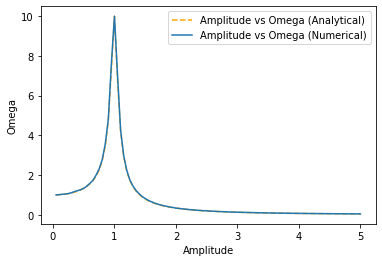

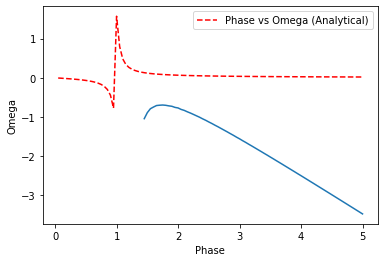

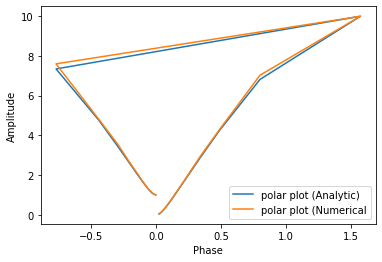

In [7]:
import numpy as np
import matplotlib.pyplot as plt

omega_0 = 1
F0 = 1
num_steps = 100
y_0 = 0 
omega_list = np.linspace(0.05,5,100)
gamma = 0.1
t0 = 0
tf = 200 
def F(t): 
  return F0 * np.cos(omega*t)
def solve_ode(omega,omega_0,gamma):
  def f(t,y):
      y1, y2 = y
      return np.array([y2,F(t) -gamma*y2-omega_0**2*y1 ])
  num_steps2 = 3000

  t = np.linspace(t0,tf,num=num_steps2+1)
  h = t[1] - t[0]
    
  # initialize output
  y = np.zeros((num_steps2+1,2))
  y[0] = [y_0,0]
    
  for i in range(num_steps2):
        
    ti = t[i]
    yi = y[i]
        
    k1 = f(ti,yi) # Stage 1
    k2 = f(ti+0.5*h,yi+0.5*h*k1) # Stage 2
    k3 = f(ti+0.5*h,yi+0.5*h*k2) # Stage 3
    k4 = f(ti+h,yi+h*k3) # Stage 4
        
    # Final slope
    k = (k1 + 2*k2 + 2*k3 + k4)/6
        
    y[i+1] = yi + h*k 
  return t,y

amplitude_list = []
phase_list = []
A_numerical = []
P_numerical = []
for omega in omega_list: 
  t,y = solve_ode(omega,omega_0,gamma)
  position = y[:,0]
  A = np.amax(position[1000:])
  A_numerical.append(A) 
  Amp = F0/np.sqrt((omega_0**2 - omega**2)**2 + gamma**2 * omega**2)
  Phase = np.arctan((gamma * omega )/(omega**2 - omega_0**2)) 
  amplitude_list.append(Amp)
  phase_list.append(Phase) 

# Not sure how to numerically solve for the phase

plt.plot(omega_list,amplitude_list , label = 'Amplitude vs Omega (Analytical)', linestyle = '--', color = 'orange')
plt.plot(omega_list, A_numerical, label = 'Amplitude vs Omega (Numerical)')
plt.legend()
plt.ylabel('Omega')
plt.xlabel('Amplitude')
plt.show()

plt.plot(omega_list, phase_list, label = 'Phase vs Omega (Analytical)', linestyle = '--', color = 'red')
plt.plot(omega_list, P_numerical)
plt.ylabel('Omega')
plt.xlabel('Phase')
plt.legend()
plt.show()

plt.plot(phase_list, amplitude_list, label = 'polar plot (Analytic)')
plt.plot(phase_list, A_numerical, label = 'polar plot (Numerical')
plt.xlabel('Phase')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: RuntimeWarning: divide by zero encountered in double_scalars


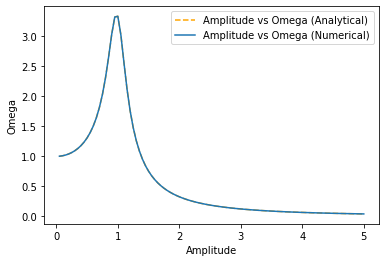

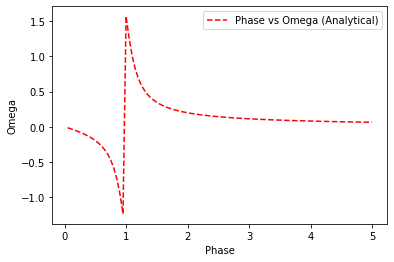

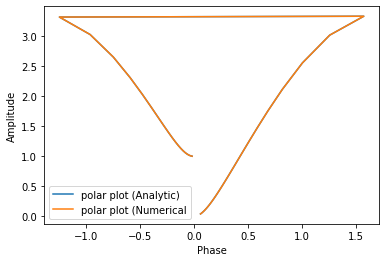

In [89]:
import numpy as np
import matplotlib.pyplot as plt

omega_0 = 1
F0 = 1
num_steps = 100
y_0 = 0 
omega_list = np.linspace(0.05,5,100)
gamma1 = 0.3
t0 = 0
tf = 200 
def F(t): 
  return F0 * np.cos(omega*t)
def solve_ode(omega,omega_0,gamma):
  def f(t,y):
      y1, y2 = y
      return np.array([y2,F(t) -gamma*y2-omega_0**2*y1 ])
  num_steps2 = 3000

  t = np.linspace(t0,tf,num=num_steps2+1)
  h = t[1] - t[0]
    
  # initialize output
  y = np.zeros((num_steps2+1,2))
  y[0] = [y_0,0]
    
  for i in range(num_steps2):
        
    ti = t[i]
    yi = y[i]
        
    k1 = f(ti,yi) # Stage 1
    k2 = f(ti+0.5*h,yi+0.5*h*k1) # Stage 2
    k3 = f(ti+0.5*h,yi+0.5*h*k2) # Stage 3
    k4 = f(ti+h,yi+h*k3) # Stage 4
        
    # Final slope
    k = (k1 + 2*k2 + 2*k3 + k4)/6
        
    y[i+1] = yi + h*k 
  return t,y

amplitude_list = []
phase_list = []
A_numerical = []
P_numerical = []
for omega in omega_list: 
  t,y = solve_ode(omega,omega_0,gamma1)
  position = y[:,0]
  A = np.amax(position[1000:])
  A_numerical.append(A) 
  Amp = F0/np.sqrt((omega_0**2 - omega**2)**2 + gamma1**2 * omega**2)
  Phase = np.arctan((gamma1 * omega )/(omega**2 - omega_0**2)) 
  amplitude_list.append(Amp)
  phase_list.append(Phase) 

plt.plot(omega_list,amplitude_list , label = 'Amplitude vs Omega (Analytical)', linestyle = '--', color = 'orange')
plt.plot(omega_list, A_numerical, label = 'Amplitude vs Omega (Numerical)')
plt.legend()
plt.ylabel('Omega')
plt.xlabel('Amplitude')
plt.show()

plt.plot(omega_list, phase_list, label = 'Phase vs Omega (Analytical)', linestyle = '--', color = 'red')
plt.ylabel('Omega')
plt.xlabel('Phase')
plt.legend()
plt.show()

plt.plot(phase_list, amplitude_list, label = 'polar plot (Analytic)')
plt.plot(phase_list, A_numerical, label = 'polar plot (Numerical')
plt.xlabel('Phase')
plt.ylabel('Amplitude')
plt.legend()
plt.show()